In [1]:
from platform import python_version
python = python_version()
print(f'Pyhton version used on this Jupyter Notebook: {python}')

Pyhton version used on this Jupyter Notebook: 3.12.3


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

### Carregando Dados

In [3]:
# Carrega o dataset
dataset = pd.read_csv('datasettimeseries.csv')

In [4]:
dataset.shape

(365, 2)

In [7]:
dataset.columns

Index(['Data', 'Total_Vendas'], dtype='object')

In [8]:
dataset.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [9]:
dataset.tail()

,Data,Total_Vendas
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


### Pré-Processamento dos Dados

In [10]:
dataset['Data'].min()

'2023-01-01'

In [11]:
dataset['Data'].max()

'2023-12-31'

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [13]:
# Converte a coluna de objeto em data
dataset['Data'] = pd.to_datetime(dataset['Data'])

In [14]:
dataset.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [16]:
time_series = dataset.set_index('Data')['Total_Vendas']

In [17]:
type(time_series)

pandas.core.series.Series

In [18]:
time_series

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [19]:
time_series = time_series.asfreq('D')

In [20]:
time_series

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

<Axes: xlabel='Data'>

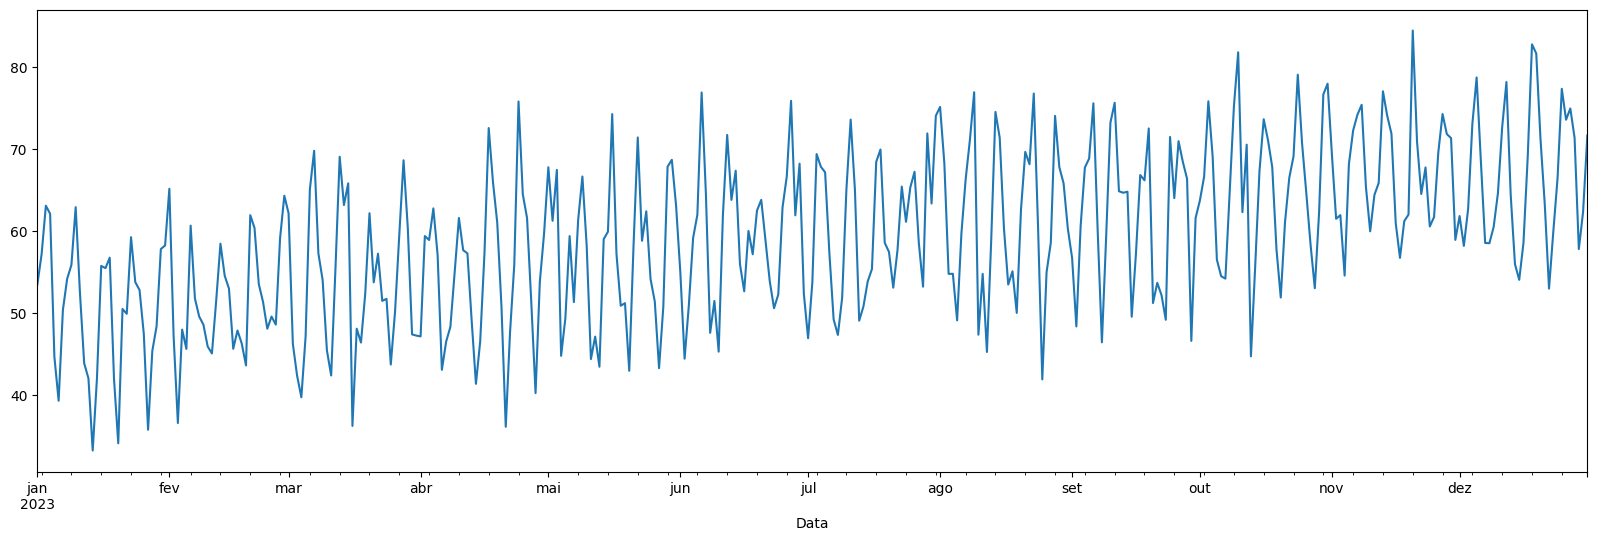

In [26]:
time_series.plot(figsize = (20, 6))